In [6]:
#curve from EC_OC_Percent

import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from numpy import arange
import numpy as np
import seaborn as sns


# Load the data

input_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/yp1_allEC_reordered.csv"
df = pd.read_csv(input_csv)

df




,Time(h),xEC01,xEC02,xEC03,xEC04,xEC05,xEC06,Unnamed: 7,EC01,EC02,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,1.0,63.000715,64.711577,70.654679,71.911541,75.517723,75.59298,NaN,0.237184,0.456084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,64.000715,65.711577,71.654679,72.911541,76.517723,76.59298,NaN,0.333921,0.698932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,65.000715,66.711577,72.654679,73.911541,77.517723,77.59298,NaN,0.382398,0.892449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,66.000715,67.711577,73.654679,74.911541,78.517723,78.59298,NaN,0.420264,0.869849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,67.000715,68.711577,74.654679,75.911541,79.517723,79.59298,NaN,0.340063,1.036225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,NaN,NaN,75.654679,NaN,NaN,80.59298,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,NaN,NaN,76.654679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,NaN,NaN,77.654679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:


# Extract Data
x = df['Fixed_oocytePT']
y = df['Fixed_oocyteYP1']

# Ensure there are no NaN or infinite values in x and y
valid_indices = np.isfinite(x) & np.isfinite(y)
x = x[valid_indices]
y = y[valid_indices]

# Perform the log transformation on y and fit a polynomial (linear) to the data
p = np.polyfit(x, np.log(y), 1)

# Define the exponential function to model the data
f = lambda x: np.exp(p[1]) * np.exp(p[0]*x)

# Calculate the R-squared value
y_log_pred = f(x)
R_square = r2_score(np.log(y), np.log(y_log_pred))

# Extract the slope and intercept
slope, intercept = p

print('Coefficient of Determination (R²):', R_square)
print('Intercept:', intercept)
print('Slope:', slope)

Coefficient of Determination (R²): 0.9463776813703283
Intercept: -11.114309523423488
Slope: 0.19000558938161188


/Users/shruthibalachandra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


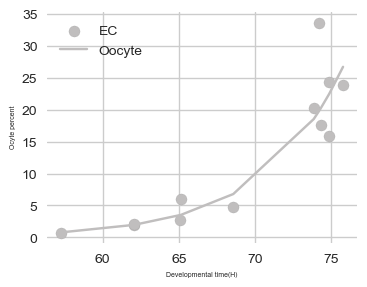

In [9]:
#Plotting  curve
# Plotting style


plt.style.use('seaborn')
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (4, 3), 'font.size': 30, 'font.family': 'sans-serif', 'font.sans-serif': "Arial"})

sns.scatterplot(x, y, marker='o', s=64,
                edgecolor='grey', linewidth=0.1,
                label='Fixed_oocyte', color="#c0bebe")


#Predicted curve fit

plt.plot(x, f(x), color = '#c0bebe')

#Labels
plt.xlabel('Developmental time(H)', fontsize=5)
plt.ylabel(' Ocyte percent', fontsize=5)
plt.legend(labels=["EC", "Oocyte", "EC_Curve fit", "Oocyte_Curve fit"], fontsize=10)

plt.xticks(size=10)
plt.yticks(size=10)

plt.savefig('/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/EC_Ocyte_Area.pdf', dpi=300, bbox_inches='tight') 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


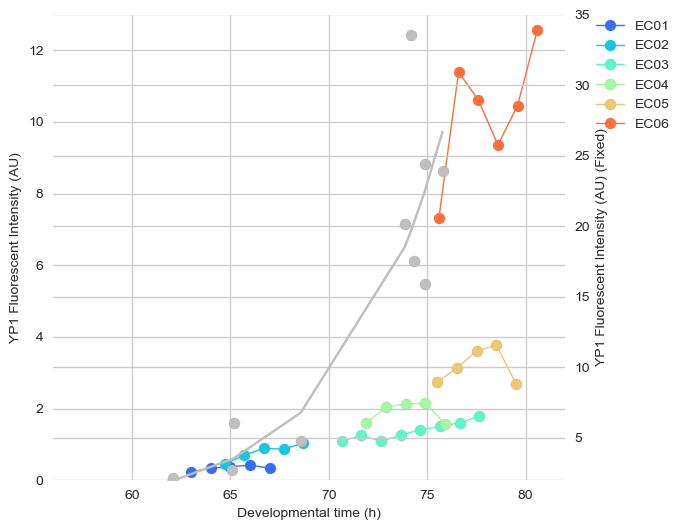

In [10]:
# Load the data
input_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/yp1_allEC_reordered.csv"
df = pd.read_csv(input_csv)

# Plotting style
plt.style.use('seaborn')
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (8, 6), 'font.size': 30, 'font.family': 'sans-serif', 'font.sans-serif': "Arial"})

# List of EC columns for y-axis
ec_columns_y = ['EC01', 'EC02', 'EC03', 'EC04', 'EC05', 'EC06']

# List of time columns for x-axis
time_columns_x = ['xEC01', 'xEC02', 'xEC03', 'xEC04', 'xEC05', 'xEC06']

# Making sure DataFrame contains all the columns
required_columns = ec_columns_y + time_columns_x + ['Fixed_oocyteYP1', 'Fixed_oocytePT']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"DataFrame is missing columns: {missing_columns}")

# Set a color palette
palette = sns.color_palette("rainbow", len(ec_columns_y))

# Create the main figure and axis
fig, ax1 = plt.subplots()

# Marker properties for each column
marker_style_dict = {ec_column: {'markersize': 8, 'edgecolor': 'grey', 'linewidth': 0.1} for ec_column in ec_columns_y}

# Loop through the EC columns and create line plots with specified marker properties
for i, ec_column in enumerate(ec_columns_y):
    style = marker_style_dict[ec_column]
    sns.lineplot(x=df[time_columns_x[i]], y=df[ec_column], ax=ax1, marker='o', markersize=style['markersize'],
                 markeredgecolor=style['edgecolor'],
                 markeredgewidth=style['linewidth'], label=ec_column, color=palette[i], linewidth=1)

ax1.set_ylim([0, 13])
ax1.set_xlim([56, 82])
ax1.set_xlabel('Developmental time (h)', fontsize=10)
ax1.set_ylabel('YP1 Fluorescent Intensity (AU)', fontsize=10)
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis
fixed_y = df['Fixed_oocyteYP1']
fixed_x = df['Fixed_oocytePT']

sns.scatterplot(x=fixed_x, y=fixed_y, ax=ax2, marker='o', s=64,
                 edgecolor='grey', linewidth=0.1, color="#c0bebe")


plt.plot(x, f(x), color = '#c0bebe')

ax2.set_ylim([2, 35])
ax2.set_xlim([56, 82])
ax2.set_ylabel('YP1 Fluorescent Intensity (AU) (Fixed)', fontsize=10)
ax2.legend(loc='upper right', bbox_to_anchor=(1.05, 0.95), borderaxespad=0.)

# Adjust the layout to fit both legends
fig.tight_layout()
fig.subplots_adjust(right=0.75)

# Save and show the plot
plt.savefig('/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Yp1_combined_reordered_curve2.pdf', dpi=300, bbox_inches='tight')
plt.show()